Joint Distribution tensor: 


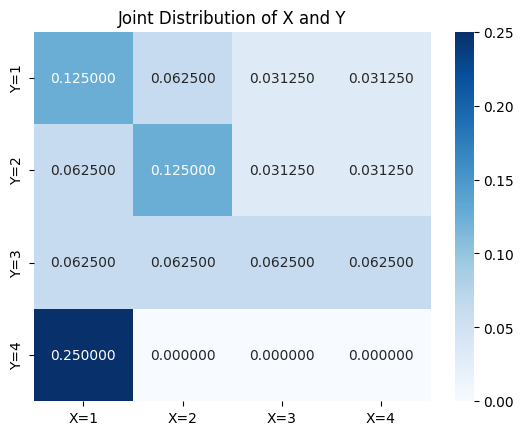

The ans if H(x|y) = H(y|x) is: False
The ans if H(x) - H(x|y) = H(y) - H(y|x) is: True
The value of I(x, y) is: 0.375


In [28]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

joint_distribution = torch.tensor([[1/8, 1/16, 1/32, 1/32], [1/16, 1/8, 1/32, 1/32], [1/16, 1/16, 1/16, 1/16], [1/4, 0, 0, 0]])

""" Printing the joint Distribution table """
print("Joint Distribution tensor: ")
sns.heatmap(joint_distribution.numpy(), annot=True, cmap="Blues", fmt=".6f", yticklabels=['Y=1', 'Y=2', 'Y=3', 'Y=4'], xticklabels=['X=1', 'X=2', 'X=3', 'X=4'])
plt.title("Joint Distribution of X and Y")
plt.show()

""" define the function to get the Marginal Function """
def marginal_probablity_y(num):
  num = num-1 # for index
  res = joint_distribution.sum(dim=1)[num]
  print(f"Marginal Probablity of y={num+1} is: {res}")
  return res

def marginal_probablity_x(num):
  num = num-1 # for index
  res = joint_distribution.sum(dim=0)[num]
  print(f"Marginal Probablity of x={num+1} is: {res}")
  return res

""" define the function to get the Entropy Function """
def entropy_functional_x():
  px = joint_distribution.sum(dim=0)
  res = -torch.sum(px * torch.log2(px + 1e-9))
  return res

def entropy_functional_y():
  py = joint_distribution.sum(dim=1)
  res = -torch.sum(py * torch.log2(py + 1e-9))
  return res


def conditional_probability_of_x_given_y():
  """ P(X|Y) = P(X, Y) / P(Y) """
  prob_y = joint_distribution.sum(dim=1)
  P_X_given_Y = joint_distribution/prob_y
  return P_X_given_Y

def conditional_probability_of_y_given_x():
  """ P(Y|X) = P(X, Y) / P(X) """
  prob_x = joint_distribution.sum(dim=0)
  P_Y_given_X = joint_distribution/prob_x
  return P_Y_given_X

def conditional_entropy_x_given_y():
    """ Calculate H(X|Y) """
    # P(Y)
    prob_y = joint_distribution.sum(dim=1)

    # P(X|Y)
    P_X_given_Y = conditional_probability_of_x_given_y()

    # H(X|Y=y) for each y
    H_X_given_Y = -torch.sum(P_X_given_Y * torch.log2(P_X_given_Y + 1e-9), dim=1)
    H_X_given_Y[torch.isnan(H_X_given_Y)] = 0  # Handle log(0) case

    # Final H(X|Y) = Sum(P(Y) * H(X|Y=y))
    H_X_given_Y_final = torch.sum(prob_y * H_X_given_Y)

    return H_X_given_Y_final

def conditional_entropy_y_given_x():
    """ Calculate H(Y|X) """
    # P(X)
    prob_x = joint_distribution.sum(dim=0)

    # P(Y|X)
    P_Y_given_X = conditional_probability_of_y_given_x()

    # H(Y|X=x) for each x
    H_Y_given_X = -torch.sum(P_Y_given_X * torch.log2(P_Y_given_X + 1e-9), dim=0)
    H_Y_given_X[torch.isnan(H_Y_given_X)] = 0  # Handle log(0) case

    # Final H(Y|X) = Sum(P(X) * H(Y|X=x))
    H_Y_given_X_final = torch.sum(prob_x * H_Y_given_X)

    return H_Y_given_X_final

def case1():
  return conditional_entropy_y_given_x() == conditional_entropy_x_given_y()

def case2():
  return (entropy_functional_x()-conditional_entropy_x_given_y()) == (entropy_functional_y()-conditional_entropy_y_given_x())

def case3():
  # Calculate Joint Entropy H(X, Y)
  joint_entropy = -torch.sum(joint_distribution * torch.log2(joint_distribution + 1e-9))

  # Calculate Entropies H(X) and H(Y)
  H_x = entropy_functional_x()
  H_y = entropy_functional_y()

  # Mutual Information I(X, Y)
  mutual_information = H_x + H_y - joint_entropy
  return mutual_information

print(f"The ans if H(x|y) = H(y|x) is: {case1()}")
print(f"The ans if H(x) - H(x|y) = H(y) - H(y|x) is: {case2()}")
print(f"The value of I(x, y) is: {case3()}")


